# Let's have a look at the data!

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
import string
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
#Loading the dataset
pd.set_option('display.max_columns', None)
data = pd.read_csv("data/Train_Dataset.csv")
data.head()

/tmp/ipykernel_1483222/4258980842.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Train_Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
#Data dimensions
data.shape

(121856, 40)

In [4]:
#Asigning features to X and target to y 
#we drop ID cause it is not a feature
X = data.drop(columns=["Default", "ID"])
y = data.Default

In [5]:
#1 means the client defaulted on loan payments and 0 means otherwise
#Traget is highly imbalanced towards 0
y.value_counts(normalize = True)

Default
0    0.919208
1    0.080792
Name: proportion, dtype: float64

In [6]:
#Splitting data into train and test
#stratify ensures there is a good representation of the classes (0 and 1 ) in train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [7]:
#Analyzing features types
X_train.dtypes

Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_

In [8]:
# We can not convert object values to numeric directly
#This might be due to presence of other characters in the columsn that should be numeric

#X_train["Client_Income"].astype(float)

In [9]:
#We need to remove unwanted characters from numeric columns

In [10]:
num_list = X_train.select_dtypes(include=['float64','Int64']).columns.to_list()

In [11]:
#numeric columns to fix
col_to_fix = ["Score_Source_2",
              "Score_Source_3", 
              "Client_Income", 
              "Credit_Amount", 
              "Loan_Annuity", 
              "Age_Days",
              "Employed_Days",
              "Registration_Days",
              "ID_Days",
              "Population_Region_Relative"
             ]

# Building the pipeline and fixing that type!

In [12]:
#we are going to remove unwanted characters from the numeric columns
#acnd convert columns to float

In [13]:
def clean_df(X):
    
    def clean_value(value):
        unwanted_char = string.punctuation.replace(".", "") + string.ascii_letters 
        for tag in unwanted_char:
            value = value.replace(tag, "")
        value = np.nan if not value else value
        return float(value)
    
    X = pd.DataFrame(X)
    X = X.astype(str).applymap(clean_value)
    return X
        

In [14]:
#Create a fucntion transformer with clean_df function

cleaner = FunctionTransformer(clean_df)

#create column transformer for cleaner function

type_cleaner = ColumnTransformer(
    [("type_cleaner", cleaner, col_to_fix)],
    remainder = "passthrough").set_output(transform = "pandas")

/home/nicole/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [15]:
#Lets check that the cleaning works
#Columns type is now correct
corrected_data = pd.DataFrame(type_cleaner.fit_transform(X_train))
corrected_data.dtypes

/tmp/ipykernel_1483222/3813637444.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.astype(str).applymap(clean_value)


type_cleaner__Score_Source_2                float64
type_cleaner__Score_Source_3                float64
type_cleaner__Client_Income                 float64
type_cleaner__Credit_Amount                 float64
type_cleaner__Loan_Annuity                  float64
type_cleaner__Age_Days                      float64
type_cleaner__Employed_Days                 float64
type_cleaner__Registration_Days             float64
type_cleaner__ID_Days                       float64
type_cleaner__Population_Region_Relative    float64
remainder__Car_Owned                        float64
remainder__Bike_Owned                       float64
remainder__Active_Loan                      float64
remainder__House_Own                        float64
remainder__Child_Count                      float64
remainder__Accompany_Client                  object
remainder__Client_Income_Type                object
remainder__Client_Education                  object
remainder__Client_Marital_Status             object
remainder__C

In [16]:
corrected_data.isna().sum()*100/len(data)

type_cleaner__Score_Source_2                 3.747046
type_cleaner__Score_Source_3                17.690553
type_cleaner__Client_Income                  2.341288
type_cleaner__Credit_Amount                  2.385603
type_cleaner__Loan_Annuity                   3.168494
type_cleaner__Age_Days                       2.385603
type_cleaner__Employed_Days                  2.434841
type_cleaner__Registration_Days              2.375755
type_cleaner__ID_Days                        3.902967
type_cleaner__Population_Region_Relative     3.217732
remainder__Car_Owned                         2.321593
remainder__Bike_Owned                        2.373293
remainder__Active_Loan                       2.393809
remainder__House_Own                         2.394630
remainder__Child_Count                       2.391347
remainder__Accompany_Client                  1.153821
remainder__Client_Income_Type                2.434020
remainder__Client_Education                  2.398733
remainder__Client_Marital_St

In [17]:
#pipeline for processing numerical features
#this pipeline deals with missing values replacing them with 0 and scales numerical data

num_preproc = Pipeline([
    ("num_imputer", SimpleImputer(strategy = "constant", fill_value=0.)),
    ("scaler", StandardScaler())
])

In [18]:
#pipeline for processing categorical features: replaces nan with missing
#For non-binary categorical features, each unique category will be converted to a separate binary column.
#For binary categorical features (features with exactly two unique values), 
#one of the categories will be dropped (to avoid multicollinearity in linear models).

cat_preproc = Pipeline([
    ("cat_imputer", SimpleImputer(strategy = "constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(handle_unknown = "ignore", sparse_output=False,drop='if_binary'))
])

In [19]:
#creating column transformer to combine numeric and categorical processing pipelines

preproc = ColumnTransformer([
    ("num_tr", num_preproc, make_column_selector(dtype_include = ["float64", "int64"])),
    ("cat_tr", cat_preproc, make_column_selector(dtype_include = ["object"]))
])

# Balance the dataset

## Oversampling - SMOTE

In [20]:
# Define your pipeline using imblearn.pipeline
pipe= ImbPipeline([
    ("cleaner", type_cleaner),     # type_cleaner is already defined
    ("preprocessing", preproc),    # preproc is already defined
    ("smote", SMOTE(random_state=42)),  # SMOTE for oversampling
    ("classifier", CalibratedClassifierCV(RandomForestClassifier(class_weight="balanced"), cv=5))  # CalibratedClassifierCV after SMOTE
])


In [21]:
pipe.fit(X_train,y_train)

/tmp/ipykernel_1483222/3813637444.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.astype(str).applymap(clean_value)


Pipeline(steps=[('cleaner',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type_cleaner',
                                                  FunctionTransformer(func=<function clean_df at 0x7fb6bc6191b0>),
                                                  ['Score_Source_2',
                                                   'Score_Source_3',
                                                   'Client_Income',
                                                   'Credit_Amount',
                                                   'Loan_Annuity', 'Age_Days',
                                                   'Employed_Days',
                                                   'Registration_Days',
                                                   'ID_Days',
                                                   'Population_Region_Relative'])])),
                ('preprocessing',...
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb6bc6c8670>)])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 CalibratedClassifierCV(cv=5,
                                        estimator=RandomForestClassifier(class_weight='balanced')))])

In [22]:
# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

/tmp/ipykernel_1483222/3813637444.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.astype(str).applymap(clean_value)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22403
           1       0.81      0.13      0.23      1969

    accuracy                           0.93     24372
   macro avg       0.87      0.57      0.60     24372
weighted avg       0.92      0.93      0.90     24372



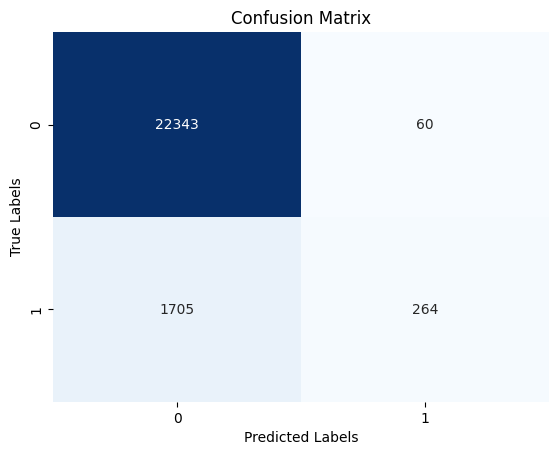

In [24]:
# Create and Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
# plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()